# Logistic regression self

## 函数编写

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score 

In [2]:
# sigmoid函数
def sigmoid(t):
    return 1. / (1. + np.exp(-t))

# cost函数
def J(x_b, y, theta):
    y_heat = sigmoid(x_b.dot(theta))
    return -np.sum(y * np.log(y_heat) + (1 - y) * np.log(1 - y_heat)) / len(y)

# 梯度求解
def delta_J(x_b, y, theta):
    return x_b.T.dot(sigmoid(x_b.dot(theta)) - y) / len(y)

In [3]:
# 梯度下降法函数
def gradient_descent(x_b, y, theta_init, eta, iter_times):
    theta = theta_init
    loss_his = []
    
    while iter_times:
        gradient = delta_J(x_b, y, theta)
        theta -= eta * gradient
        loss = J(x_b, y, theta)
        
        loss_his.append(loss)
        iter_times -= 1
    
    return theta, loss_his

# 预测函数
def predict(x, theta):
    x_b = np.hstack([np.ones(shape=(len(x),1)), x])
    predict_prob = sigmoid(x_b.dot(theta))
    return np.array(predict_prob >= 0.5, dtype=int)

def score(y_predict, y_real):
    return accuracy_score(y_real, y_predict)

## 数据测试

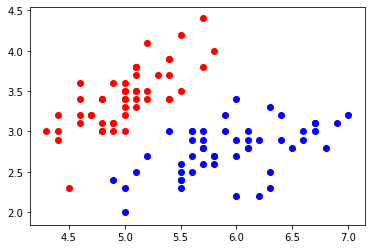

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x_prime = iris.data
y_prime = iris.target

# 转化为二分类问题对应的数据
x_prime = x_prime[y_prime < 2, :2]
y_prime = y_prime[y_prime < 2]

plt.scatter(x_prime[y_prime==0, 0], x_prime[y_prime==0, 1], color = "red")
plt.scatter(x_prime[y_prime==1, 0], x_prime[y_prime==1, 1], color = "blue")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_prime, y_prime, random_state = 666)

In [5]:
x_train_b = np.hstack([np.ones(shape=(len(x_train), 1)), x_train])
theta_init = np.zeros(shape=(x_train_b.shape[1]))
eta = 0.1
iter_times = 1000000

In [6]:
theta_fina, loss_his = gradient_descent(x_train_b, y_train, theta_init, eta, iter_times)

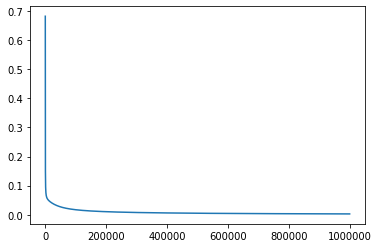

In [7]:
plt.plot(loss_his)
plt.show()

In [8]:
score(y_test, predict(x_test, theta_fina)) 

1.0

In [9]:
theta_fina

array([-48.16640517,  19.15257671, -17.55156967])

## 决策边界

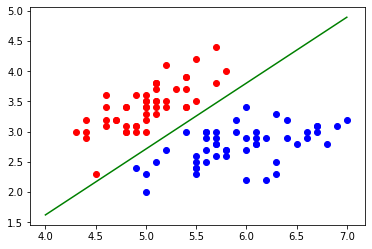

In [10]:
def x2(x1, theta):
    return (-theta[0] - theta[1] * x1) / theta[2]

x1_plot = np.linspace(4, 7, 100)
x2_plot = x2(x1_plot, theta_fina)

plt.plot(x1_plot, x2_plot, color = "green")
plt.scatter(x_prime[y_prime==0, 0], x_prime[y_prime==0, 1], color = "red")
plt.scatter(x_prime[y_prime==1, 0], x_prime[y_prime==1, 1], color = "blue")
plt.show()